## <p style='text-align:center'><font color = yellow>Chapter 04: Full Course : Numerical Differentiation and Integration

### <font color = green|><b>I.) Numerical Differentiation

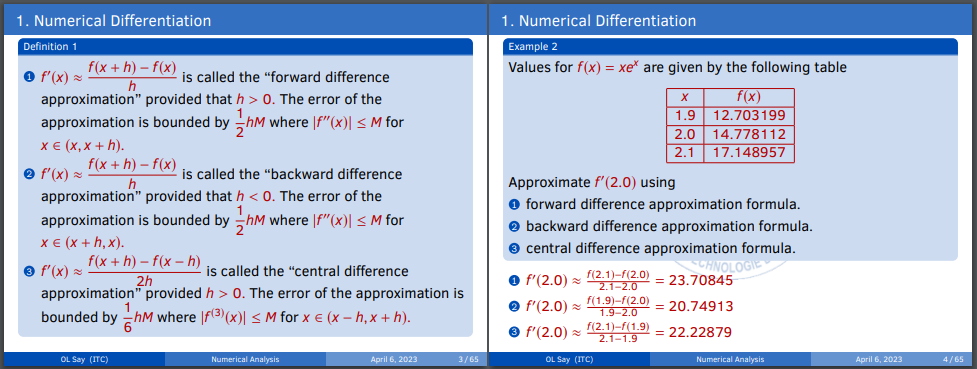 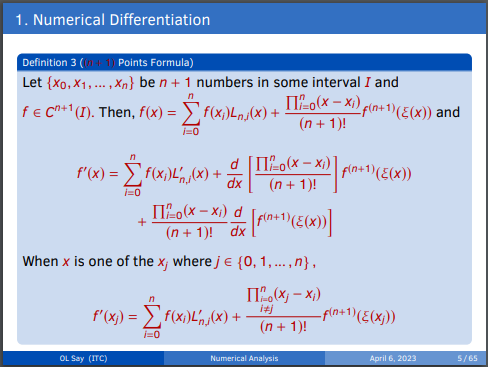 
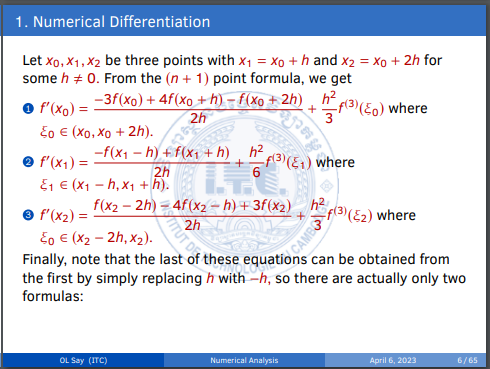 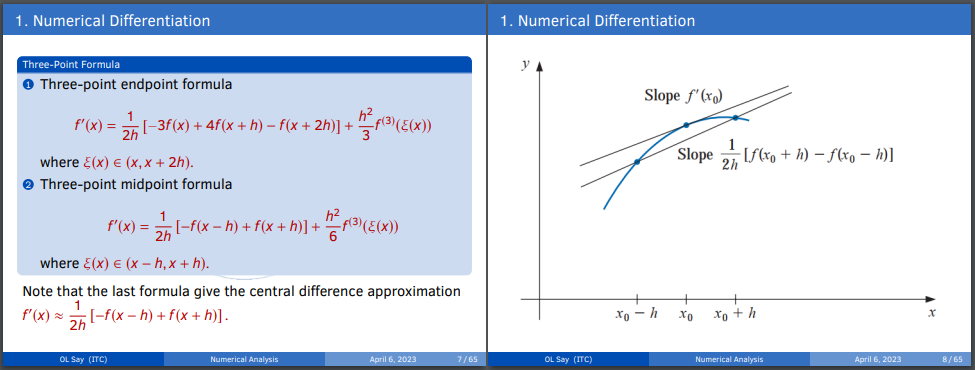
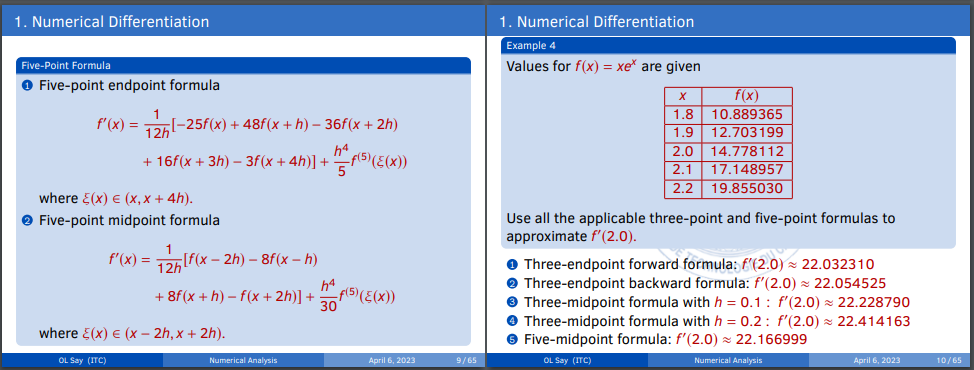 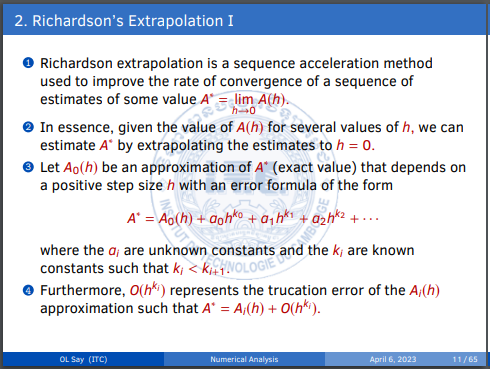
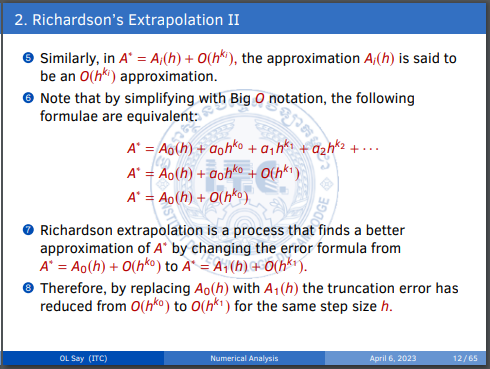

In [1]:
def ForwardDifference(x:list[float],y:list[float])->tuple[float,float]:
    h = x[1] - x[0]
    fp = (y[1]-y[0])/h
    return (x[0],fp)

if __name__ == "__main__":
    x = [1.9,2.0,2.1]
    y = [12.703199,14.778112,17.148957]
    x0,fp = ForwardDifference(x=x[1:],y=y[1:])
    print(x0)
    print(fp)

2.0
23.70844999999997


In [2]:
def BackwardDifference(x:list[float],y:list[float])->tuple[float,float]:
    h = x[1]-x[0]
    fp = (y[1]-y[0])/h    
    return (x[1],fp)

if __name__ == '__main__':
    x = [1.9,2.0,2.1]
    y = [12.703199,14.778112,17.148957]
    x0,fp = BackwardDifference(x=x[:-1],y=y[:-1])
    print(x0)
    print(fp)

2.0
20.749129999999987


In [3]:
def CentralDifference(x:list[float],y:list[float])->tuple[float,float]:
    
    h = x[1]-x[0]
    fp = (y[2]-y[0])/(2*h)
    return (x[1],fp)
     
if __name__ == "__main__":
    x = [1.9,2.0,2.1]
    y = [12.703199,14.778112,17.148957]
    x0,fp = CentralDifference(x=x,y=y)
    print(x0)
    print(fp)

2.0
22.22878999999998


In [4]:
def FivePointEndpoint(x:list[float],y:list[float])->tuple[float,float]:
    h = x[1]-x[0]
    fp = (-25*y[0] + 48*y[1] - 36*y[2] + 16*y[3] - 3*y[4]) / (12*h)
    return (x[0],fp)

if __name__ == "__main__":
    x = [-5,2,3,4,5]
    y = [4,5,6,7,8]
    a,b = FivePointEndpoint(x=x,y=y)
    print(a)
    print(b)

-5
0.14285714285714285


In [5]:
def FivePointMidpoint(x:list[float],y:list[float])->tuple[float,float]:
    h = x[1] - x[0]
    fp = (y[0] - 8*y[1] + 8*y[3] - y[4]) / (12*h)
    return (x[2],fp)
   

### <b><font color = green|>II.) Richardson Theorem

The Richardson theorem, also known as the Richardson extrapolation or the Richardson-Romberg extrapolation, is a mathematical result that provides a technique for improving the accuracy of numerical approximations. It was formulated by Lewis Fry Richardson, a British mathematician and physicist, in the early 20th century.

The theorem states that if a numerical method for approximating a quantity has a known error term that depends on a certain power of the step size (h) used in the approximation, then by using the method with different step sizes, it is possible to eliminate the leading error term and obtain a more accurate estimate.

In other words, the Richardson theorem provides a systematic way to estimate the true value of a quantity by performing calculations with different step sizes and using a process of extrapolation to eliminate the dominant error term. This can significantly improve the accuracy of the approximation compared to using a single step size.

The Richardson extrapolation technique is particularly useful in numerical analysis and scientific computing, where numerical approximations are commonly used to solve mathematical problems. It is often applied in numerical integration, differentiation, and solving differential equations.

The Richardson extrapolation process involves the following steps:

1. Perform the numerical approximation using a coarse step size (h) to obtain an initial estimate.

2. Repeat the numerical approximation with a finer step size (h/2) and compute an improved estimate.

3. Use these two estimates to construct a more accurate approximation by extrapolating to the limit as the step size approaches zero.

The Richardson theorem provides a theoretical foundation for this extrapolation process, showing that under certain assumptions about the error term, the extrapolated estimate can converge to the true value at a faster rate than the original approximation.

By iteratively applying the Richardson extrapolation process with finer and finer step sizes, higher-order approximations can be obtained, leading to even greater accuracy in the estimation.

The Richardson theorem has had a significant impact on numerical methods and has been widely applied in various areas of scientific and computational research, helping to improve the reliability and precision of numerical calculations.

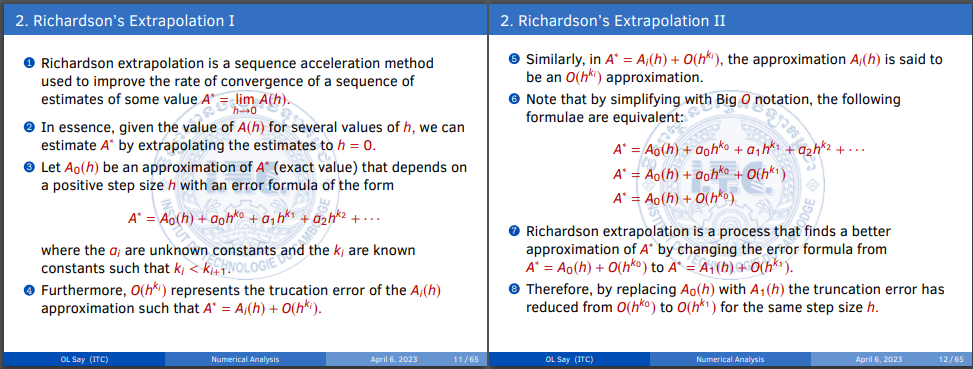 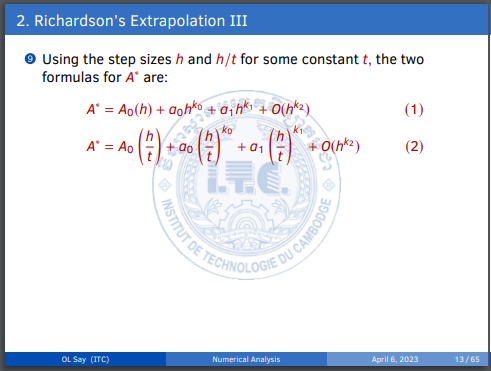 
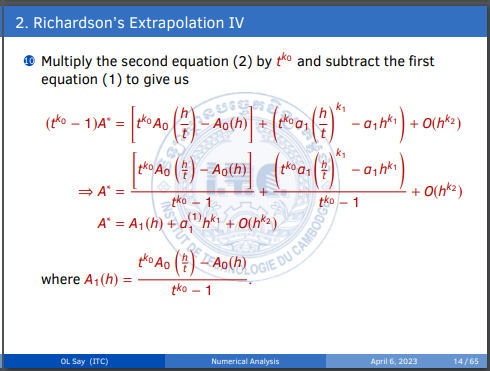 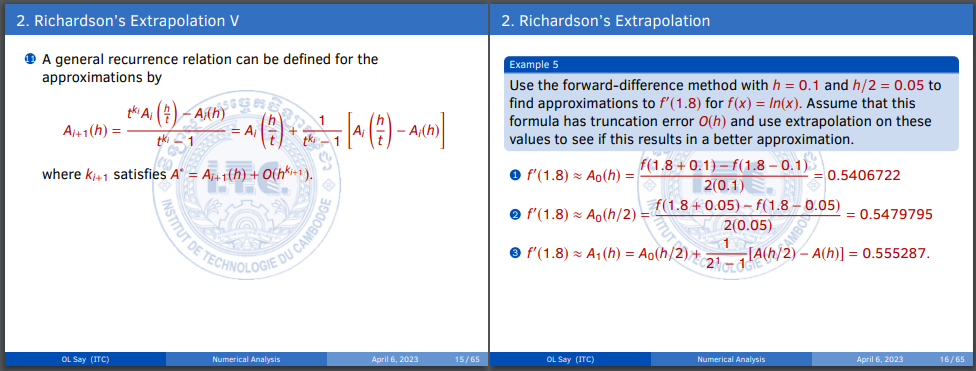 
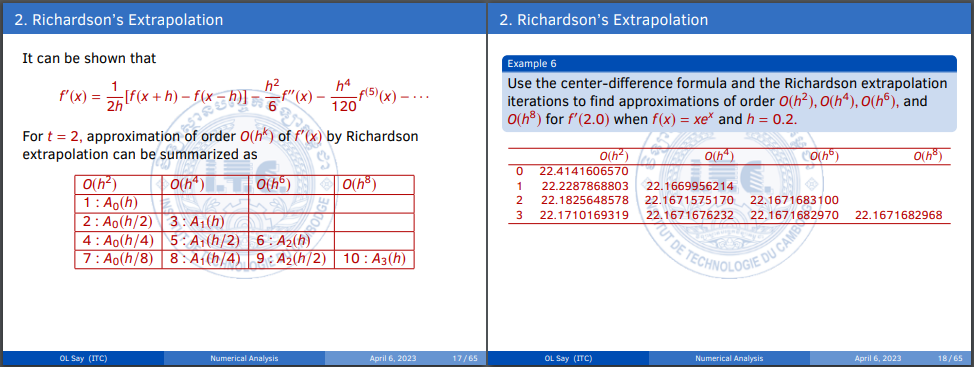

In [6]:
from collections.abc import Callable
import numpy as np
import pandas as pd

In [7]:
def Richardson(f:Callable[[float],float],
               x:float,
               h:float,
               n:int=9,
               rtol:float=1.e-10)->tuple[float,pd.DataFrame]:
  N = n+1
  D = np.full(shape=(N,N),fill_value=np.nan,dtype=np.float64)
  D[0,0] = 0.5 * (f(x+h)-f(x-h))/h
  
  for i in range(1,N,1):
    h = 0.5*h 
    D[i,0] = 0.5*(f(x+h)-f(x-h))/h 
    I = i+1 
    p =1
    
    for j in range(1,I,1):
      p = 4*p 
      D[i,j]=D[i,j-1] + (D[i,j-1]-D[i-1,j-1])/(p-1)
      
    if abs(D[i,i]-D[i-1,i-1])<rtol:
      break
  
  d = D[i,i]
  columns = [f'O(h^{2*(k+1)})' for k in range(0,I,1)]
  D = pd.DataFrame(data=D[:I,:I],columns=columns)
  return (d,D)     

<font color = yellow>

$ f(x) = e^x $

In [8]:
if __name__ == "__main__":  
  
  from math import exp 
  pd.options.display.width = 1000
  pd.options.display.float_format = "{:.10f}".format
  
  def f(x):
    return exp(x)
  
  d,D = Richardson(f=f,x=0,h=0.1)
  print(f'd = {d:.10f}')
  D.fillna(value='',inplace=True)
  print(D)

d = 1.0000000000
        O(h^2)       O(h^4)       O(h^6)       O(h^8)
0 1.0016675002                                       
1 1.0004167188 0.9999997916                          
2 1.0001041699 0.9999999870 1.0000000000             
3 1.0000260419 0.9999999992 1.0000000000 1.0000000000


<font color = yellow>

$ f(x) = log(x+1) $

In [9]:
from math import log
def f2(x):
  return log(1+x)
d,D = Richardson(f=f2,x=1,h=0.1)
print(f'd = {d:.10f}')
D.fillna(value='',inplace=True)
print(D)

d = 0.5000000000
        O(h^2)       O(h^4)       O(h^6)       O(h^8)
0 0.5004172928                                       
1 0.5001042057 0.4999998434                          
2 0.5000260441 0.4999999902 0.5000000000             
3 0.5000065106 0.4999999994 0.5000000000 0.5000000000


### <b><font color = green|>III.) Element of Numerical Integration I

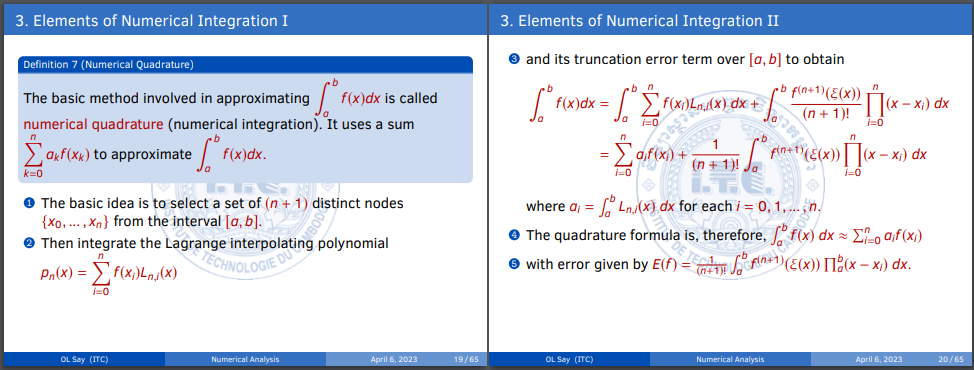 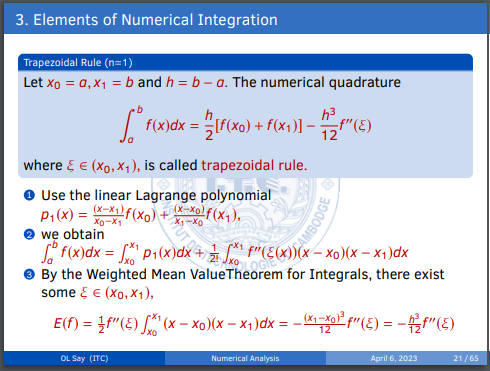 
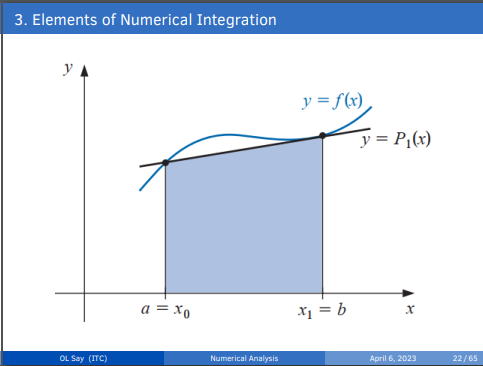 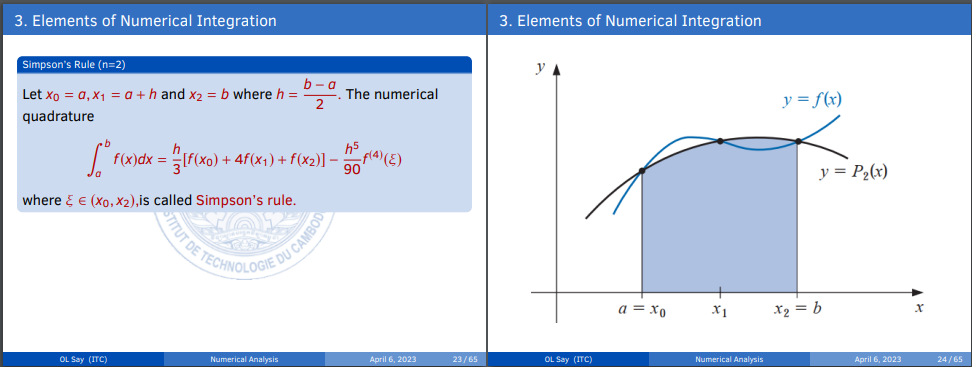 
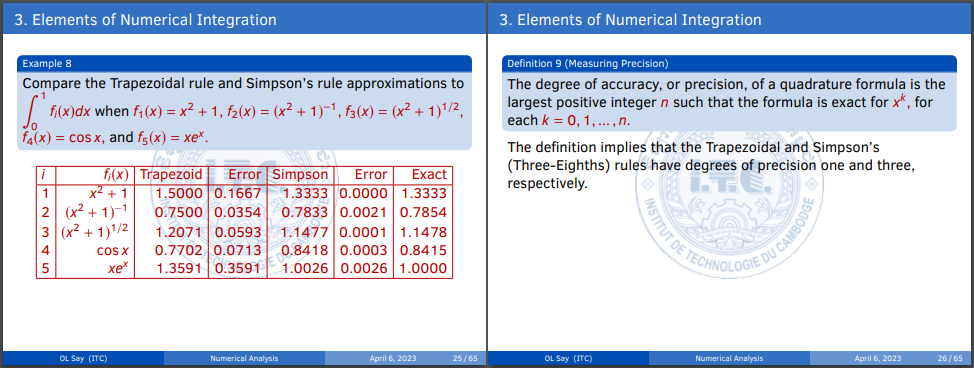 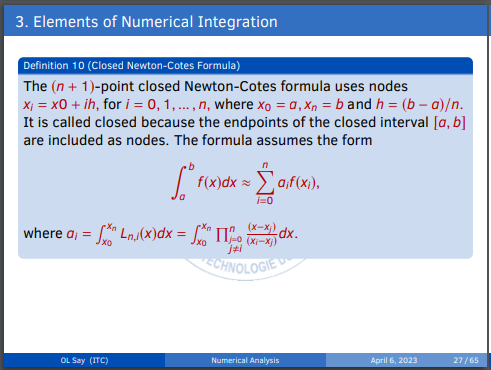 
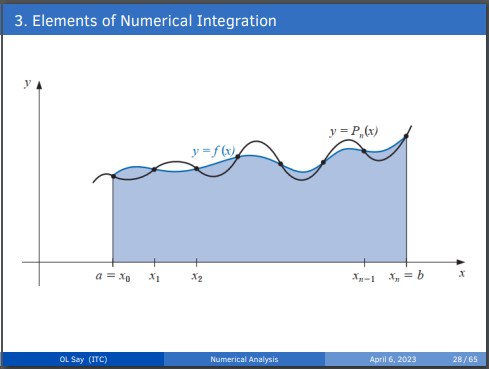 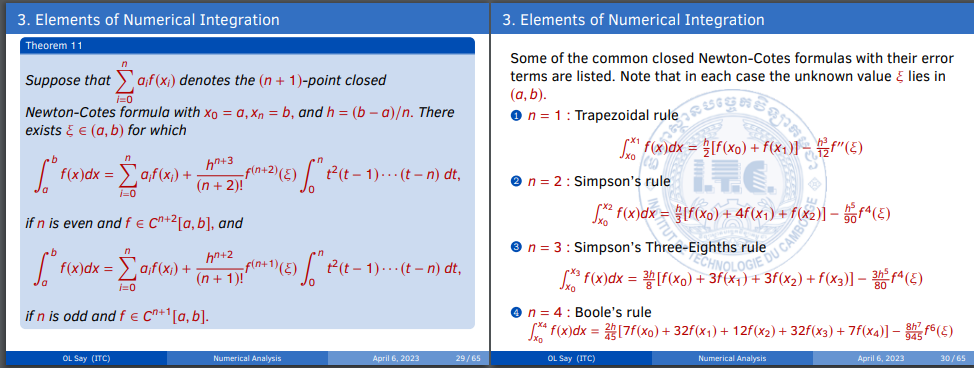 
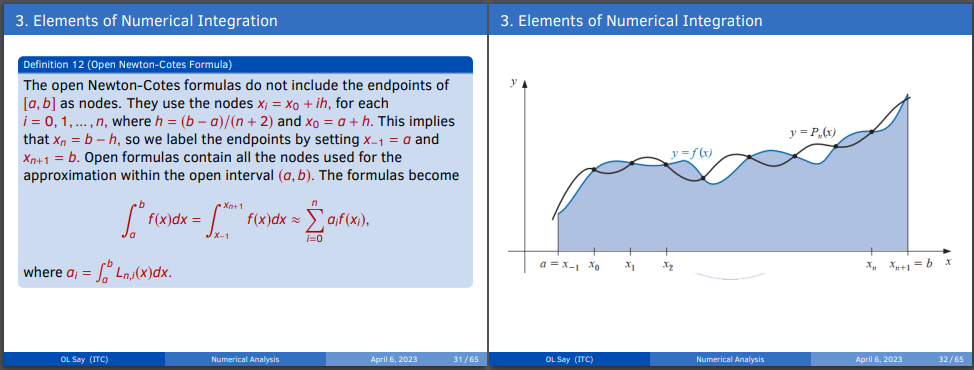 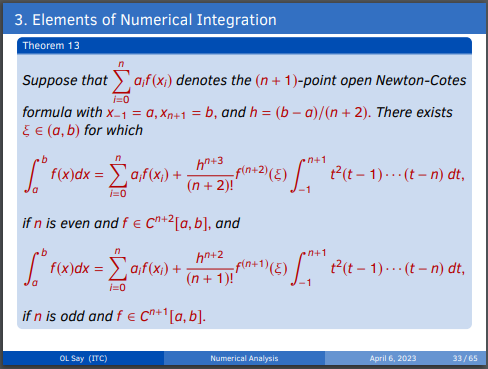 
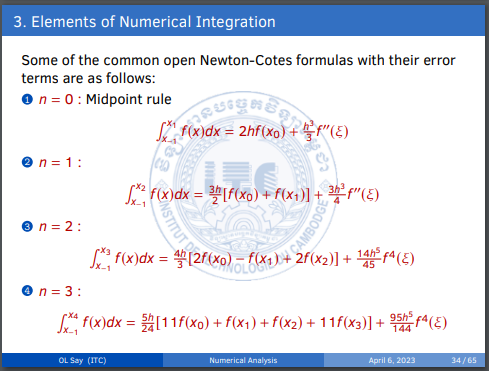 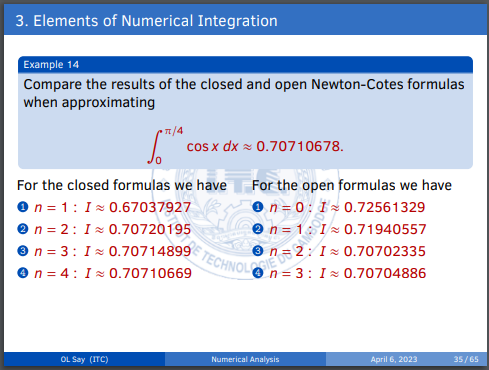

In [10]:
from collections.abc import Callable
def CompositeTrapezoid(f:Callable[[float],float],a:float,b:float,n:int)->float:
    h = (b-a)/n     
    f0 = f(a) + f(b)
    fi = 0 
    x = a 
    for _ in range(1,n,1):
        x = x+h 
        fi = fi + f(x)
        A = h*(0.5 * f0 + fi)
        print(f'step{_} : I = {A:.16f}')
    return A 

if __name__ == "__main__":
    def f(x):
        return x
    a = 0
    b = 1 
    n = 101
    k = CompositeTrapezoid(f=f,a=a,b=b,n=n) 
    print(k)

step1 : I = 0.0050485246544456
step2 : I = 0.0052445838643270
step3 : I = 0.0055386726791491
step4 : I = 0.0059307910989119
step5 : I = 0.0064209391236153
step6 : I = 0.0070091167532595
step7 : I = 0.0076953239878443
step8 : I = 0.0084795608273699
step9 : I = 0.0093618272718361
step10 : I = 0.0103421233212430
step11 : I = 0.0114204489755906
step12 : I = 0.0125968042348789
step13 : I = 0.0138711890991079
step14 : I = 0.0152436035682776
step15 : I = 0.0167140476423880
step16 : I = 0.0182825213214391
step17 : I = 0.0199490246054308
step18 : I = 0.0217135574943633
step19 : I = 0.0235761199882364
step20 : I = 0.0255367120870503
step21 : I = 0.0275953337908048
step22 : I = 0.0297519850995000
step23 : I = 0.0320066660131360
step24 : I = 0.0343593765317126
step25 : I = 0.0368101166552299
step26 : I = 0.0393588863836879
step27 : I = 0.0420056857170866
step28 : I = 0.0447505146554259
step29 : I = 0.0475933731987060
step30 : I = 0.0505342613469268
step31 : I = 0.0535731791000882
step32 : I = 0.05

In [11]:
from math import *
if __name__ == "__main__":
    def f(x):
        return cos(x)
    a = 0
    b = pi/4
    n = 101
    k = CompositeTrapezoid(f=f,a=a,b=b,n=n) 
    print(k)

step1 : I = 0.0144134027970173
step2 : I = 0.0221886818059686
step3 : I = 0.0299627853299486
step4 : I = 0.0377352432744830
step5 : I = 0.0455055856446045
step6 : I = 0.0532733425732731
step7 : I = 0.0610380443497885
step8 : I = 0.0687992214481935
step9 : I = 0.0765564045556654
step10 : I = 0.0843091246008954
step11 : I = 0.0920569127824529
step12 : I = 0.0997993005971334
step13 : I = 0.1075358198682890
step14 : I = 0.1152660027741381
step15 : I = 0.1229893818760549
step16 : I = 0.1307054901468345
step17 : I = 0.1384138609989340
step18 : I = 0.1461140283126868
step19 : I = 0.1538055264644883
step20 : I = 0.1614878903549519
step21 : I = 0.1691606554370333
step22 : I = 0.1768233577441212
step23 : I = 0.1844755339180931
step24 : I = 0.1921167212373343
step25 : I = 0.1997464576447182
step26 : I = 0.2073642817755468
step27 : I = 0.2149697329854488
step28 : I = 0.2225623513782345
step29 : I = 0.2301416778337056
step30 : I = 0.2377072540354177
step31 : I = 0.2452586224983944
step32 : I = 0.25

### <b><font color = green|>III.) Composite Simpson's Theorem

Composite Simpson's rule, also known as Simpson's composite rule or the composite Simpson's theorem, is a numerical integration method used to approximate the definite integral of a function over an interval. It is an extension of Simpson's rule and is particularly useful when dealing with functions that are not easily integrated analytically or when the interval of integration is large.

The composite Simpson's rule divides the interval of integration into smaller subintervals and approximates the integral over each subinterval using Simpson's rule. It then combines the results from all the subintervals to obtain an approximation of the overall integral.

The formula for the composite Simpson's rule can be expressed as:

```
∫[a, b] f(x) dx ≈ h/3 * [f(a) + 4 * Σf(xi) + 2 * Σf(xi+1) + f(b)]
```

where:
- `a` and `b` are the lower and upper limits of integration, respectively.
- `h` is the step size, which is calculated as `(b - a) / n`, where `n` is the number of subintervals.
- `xi` are the intermediate points within each subinterval, which are evenly spaced between `a` and `b` with a step size of `h`.

To apply the composite Simpson's rule, follow these steps:

1. Divide the interval of integration `[a, b]` into `n` subintervals of equal width `h`.
2. Compute the function values `f(xi)` at the intermediate points within each subinterval.
3. Use the composite Simpson's rule formula to calculate the approximations for each subinterval.
4. Sum up the results from all the subintervals to obtain the overall approximation for the integral.

It's important to note that the accuracy of the composite Simpson's rule depends on the number of subintervals used. Generally, increasing the number of subintervals improves the accuracy of the approximation.

The composite Simpson's rule provides a way to numerically estimate definite integrals and is widely used in numerical analysis and scientific computing. It offers a balance between simplicity and accuracy, making it a popular choice for numerical integration when more accurate methods, such as adaptive quadrature, are not required.

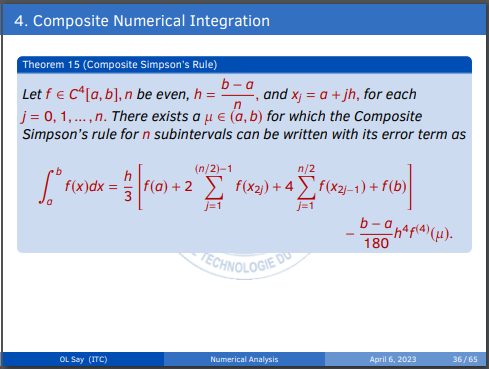 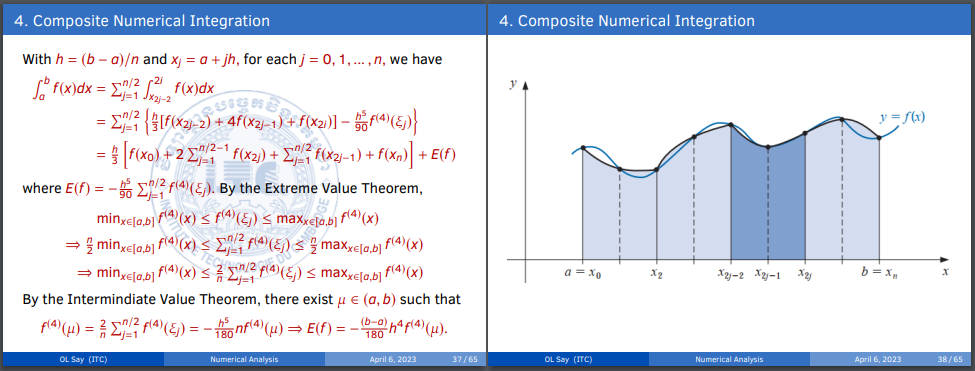 
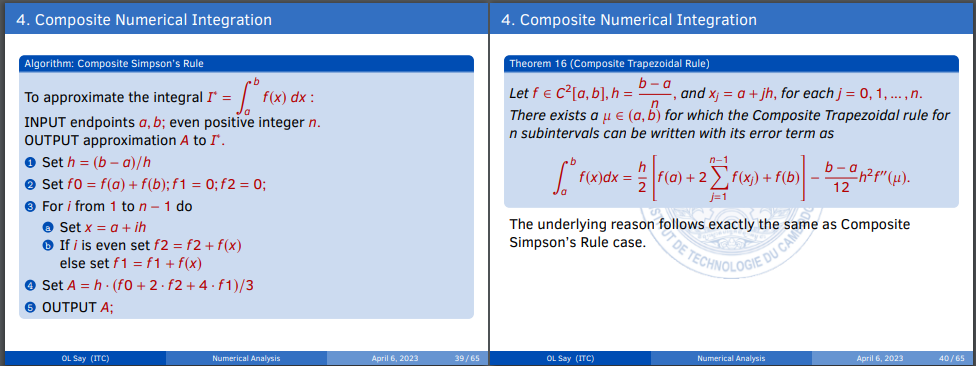 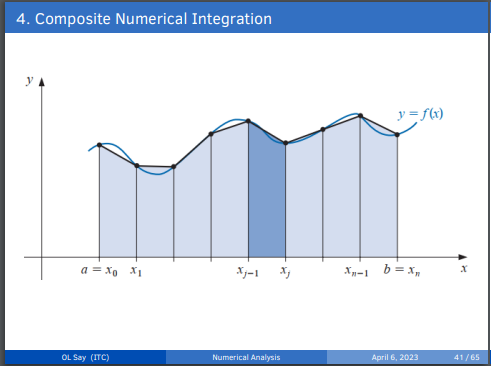 
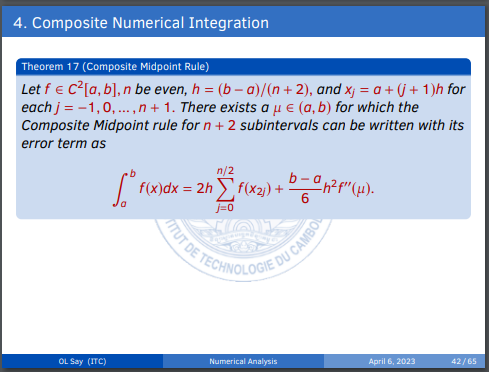 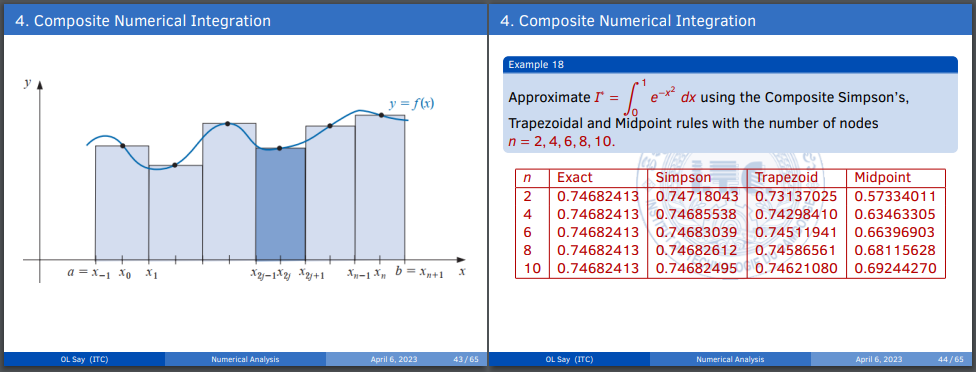 

In [12]:
from collections.abc import Callable
def CompositeSimpson(f:Callable[[float],float],a:float,b:float,n:int)->float:
  h = (b-a)/n  
  f0 = f(a)+f(b)
  f1 = 0 
  f2 = 0 
  x = a
  
  for i in range(1,n,1): 
    x = x+h 
    if(i%2==0):
      f2 = f2+f(x) 
    else:
      f1 = f1+f(x) 
  
  A = h*(f0 + 2*f2 + 4*f1)/3   
  return A  

In [13]:
if __name__ == "__main__":
  def f(x): return x**2 
  I = CompositeSimpson(f=f,a=0,b=1,n=10)         
  print(I)

0.3333333333333333


In [14]:
if __name__ == "__main__":
    from math import exp 
    def f(x): return exp(-x**2)
    I = CompositeSimpson(f=f,a=0,b=1,n=6)         
    print(I)

0.7468303914893449


In [25]:
def CompositeMidpoint(f:Callable[[float],float],a:float,b:float,n:int)->float:
    h = (b-a)/(n+2)
    h2 = 2*h 
    f2 = 0
    x = a 
    N = n+1 
    
    for _ in range(0,N,2):
        x = x + h2 
        f2 = f2 + f(x)
    A = h2 * f2 
    return A 


In [28]:
from math import exp, sin ,cos
if __name__ == "__main__":
    def f(x):
        return exp(-cos(x))
    s = CompositeMidpoint(f=f,a=0,b=1,n=6)
    print(s) 

0.4647375720495037


### <b><font color = green|>IV.) Romberg Interpolation

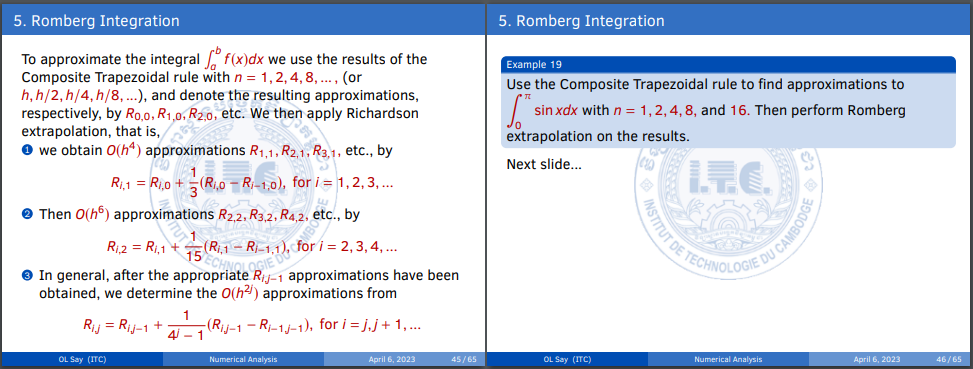 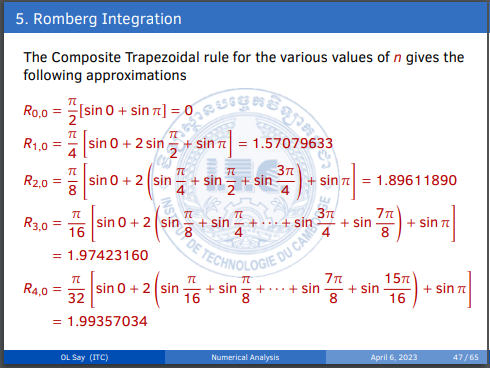 
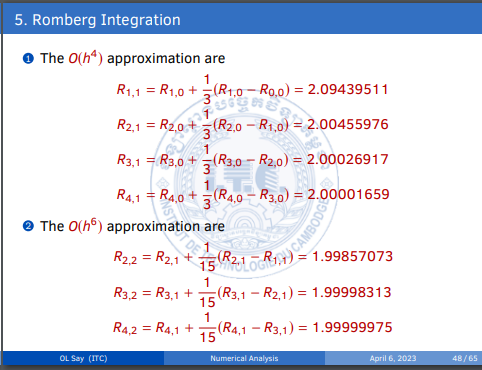 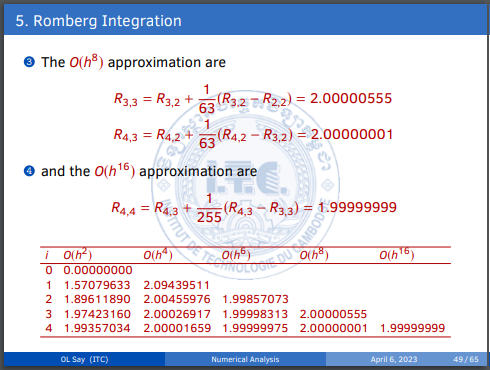

In [16]:
def CompositeTrapezoid(f:Callable[[float],float],a:float,b:float,n:int)->float:
    h = (b-a)/n     
    f0 = f(a) + f(b)
    fi = 0 
    x = a 
    for _ in range(1,n,1):
        x = x+h 
        fi = fi + f(x)
        
    A = h*(0.5 * f0 + fi)
    return A 

In [17]:
from typing import Callable, Tuple
import numpy as np

def Romberg(f: Callable[[float], float], a: float, b: float, rtol: float = 1.e-6, n: int = 10) -> Tuple[float, pd.DataFrame]:
    
    N = n + 1
    R = np.full(shape=(N, N), fill_value=np.nan, dtype=np.float64)
    ni = 1
    R[0, 0] = CompositeTrapezoid(f=f, a=a, b=b, n=ni)
    
    for i in range(1, N):
        ni = 2 * ni
        R[i, 0] = CompositeTrapezoid(f=f, a=a, b=b, n=ni)
        I = i + 1
        p = 1
        
        for j in range(1, I):
            p = 4 * p
            R[i, j] = R[i, j - 1] * (R[i, j - 1] - R[i - 1, j - 1]) / (p - 1)
            
        if abs(R[i, i] - R[i - 1, i - 1]) < rtol:
            break
        
    A = R[i, i]
    I = i + 1
    columns = [f'0(h^{2*(k+1)})' for k in range(0, I)]
    R = pd.DataFrame(data=R[0:I, 0:I], columns=columns)
    
    return A, R


if __name__ == "__main__":
    pd.options.display.float_format = "{:.8f}".format

    def f(x: float):
        return cos(x)
    a, b = 0, pi / 2
    A, R = Romberg(f=f, a=a, b=b, n=4)
    
    print(f"A = {A:.8f}")
    print(R)

A = -0.00000000
      0(h^2)     0(h^4)      0(h^6)      0(h^8)     0(h^10)
0 0.78539816        NaN         NaN         NaN         NaN
1 0.94805945 0.05140419         NaN         NaN         NaN
2 0.98711580 0.01285105 -0.00003303         NaN         NaN
3 0.99678517 0.00321276 -0.00000206 -0.00000000         NaN
4 0.99919668 0.00080319 -0.00000013 -0.00000000 -0.00000000


### <b><font color = green|>V.) Adaptive Quadrature Method

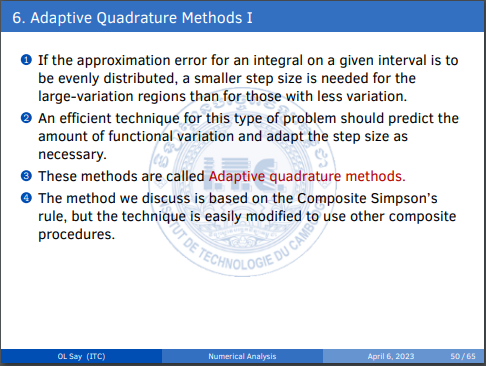 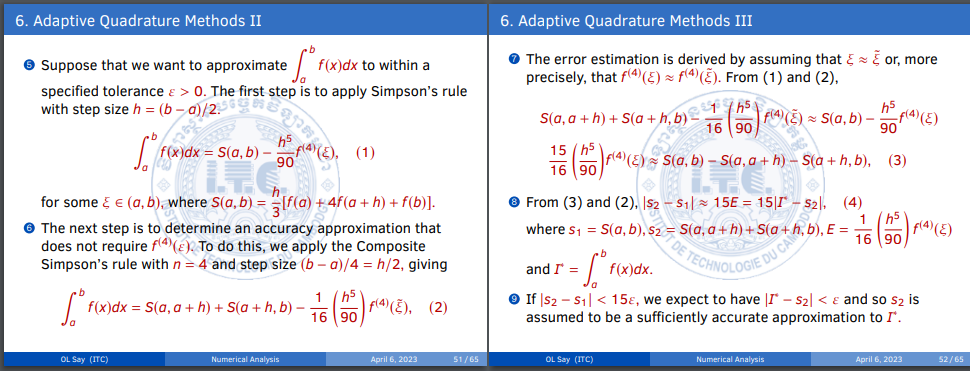 
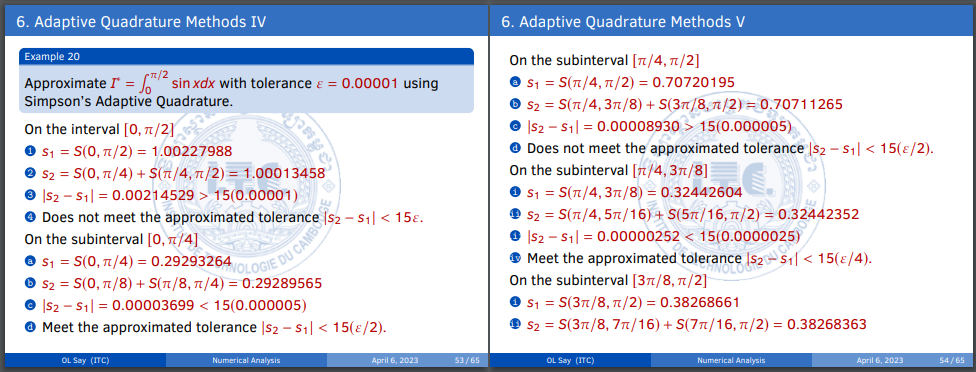 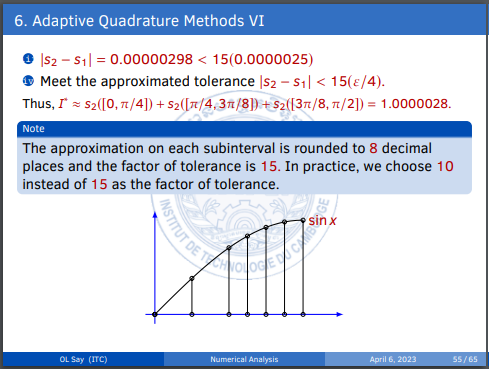

In [18]:
from collections.abc import Callable
def AddaptiveSimpson(f:Callable[[float],float],
                      a:float,b:float,tol_factor : float = 10,
                      tol:float = 1.e-10)->float:
  h = 0.5 * (b-a)
  x0 = a
  x1 = a + 0.5*h
  x2 = a + h
  x3 = a + 1.5*h
  x4 = b 

  f0 = f(x0)
  f1 = f(x1)
  f2 = f(x2)
  f3 = f(x3)
  f4 = f(x4)
  
  s1 = h*(f0+4*f2+f4)/3  # Simpson's rule n = 2
  s2 = h*(f0 + 4*f1 + 2*f2 + 4*f3 + f4)/6 # Simpson's rule n = 4 
  if abs(s2-s1)>= tol_factor * tol:
    s = AddaptiveSimpson(f=f,a= x0,b=x2,tol=0.5*tol) + AddaptiveSimpson(f=f,a=x2,b=x4,tol=0.5*tol)
  else:
    s = s2 + (s2-s1)/15 
  return s 

if __name__ == "__main__":
  from math import exp 
  def f(x:float)->float:return exp(-x**2) 
  s = AddaptiveSimpson(f=f,a=0,b=1,tol=1e-12)
  print(s)

0.746824132812427


### <b><font color = green|>VI.) Gaussian Quadrature 

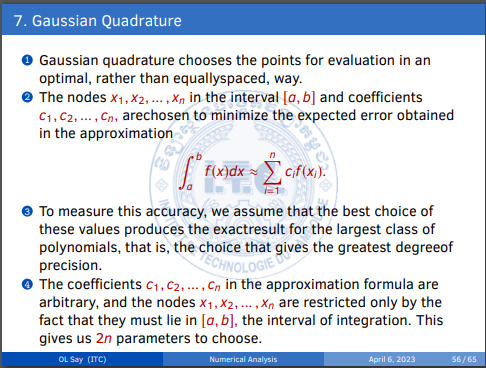 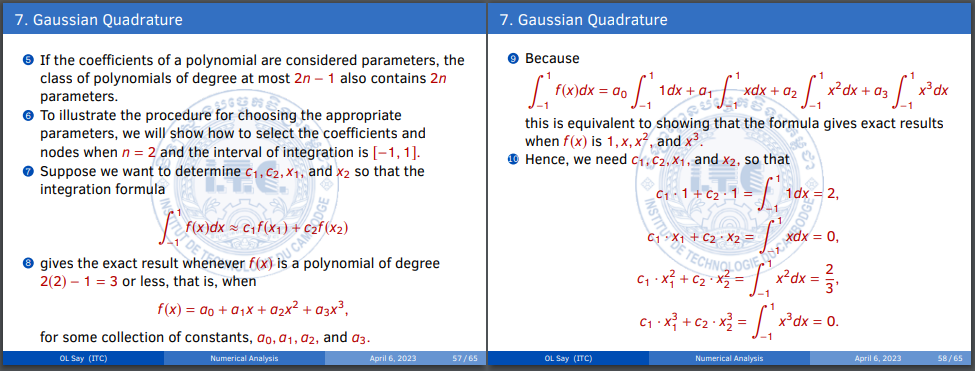 
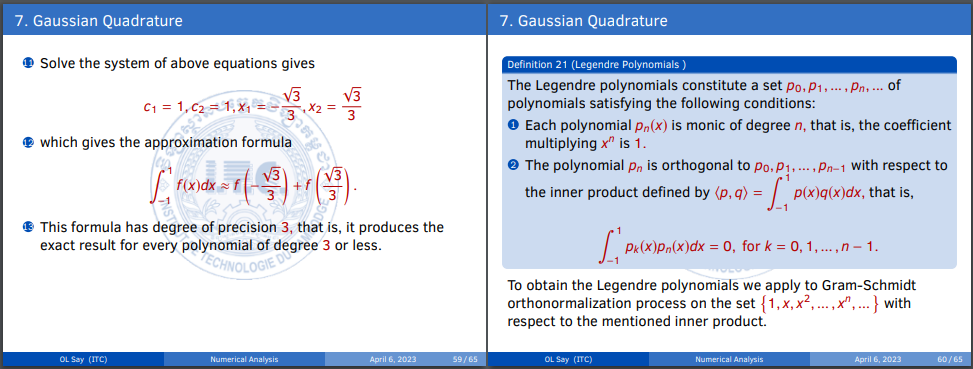 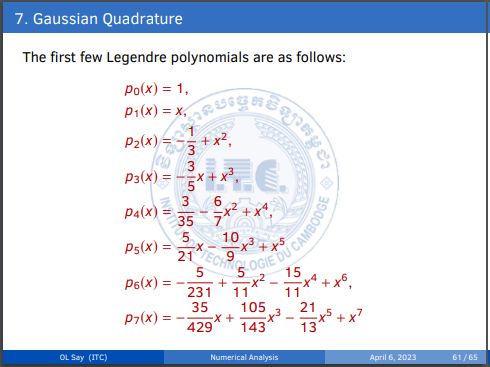 
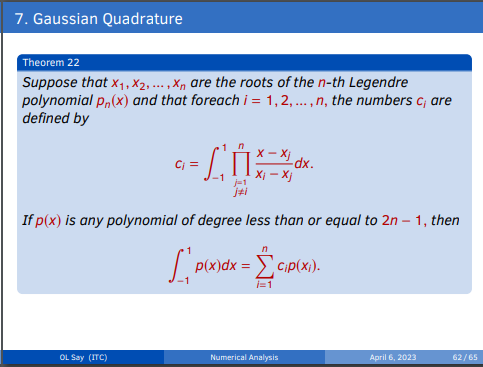 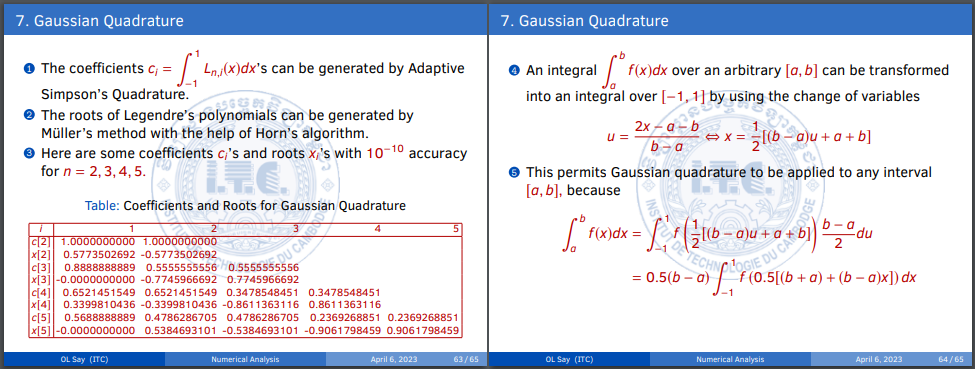
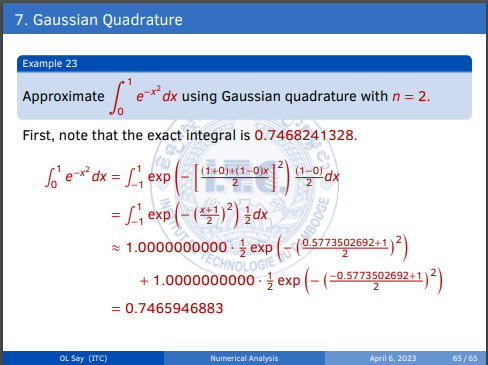

In [19]:
def Gaussian_quadrature(f:Callable[[float],float],
                        a:float,
                        b:float,
                        n:int=3)->float:
  weights = {1:[2.000000000], 
             2:[1.000000000,1.000000000],
             3:[0.888888889,0.555555556,0.555555556]
  }
  
  abscissa = {1:[0.00000000],
              2:[0.5773502692,-0.5773502692],
              3:[0.0000000000, -0.7745966692, 0.7745966692]
  }
  
  A = 0.0
  a0 = b + a
  a1 = b-a
  for (c,x) in zip(weights[n],abscissa[n]):
    A = A+c*f(0.5*(a0 + a1*x)) 
  A = A * 0.5 * a1
  return A 


if __name__ == "__main__":
  def f(x:float)->float:
    return exp(-x**2)
  g = Gaussian_quadrature(f=f,a=0,b=1)
  print(f'g = {g}') 
  

g = 0.7468145845584377


In [20]:
from collections.abc import Callable
def Gaussian_Quadrature(f:Callable[[float],float],a:float,b:float,n:int=5)->float:
    cs = {
        1:[2.0000000000], 
        2:[1.0000000000,1.000000000],
        3:[0.8888888889,0.5555555556,0.5555555556],
        4:[0.6521451549,0.6521451549,0.3478548451,0.3478548451],
        5:[0.5688888889,0.4786286705,0.4786286705,0.2369268851,0.2369268851],
    }
    xs = {
        1:[0.00000000],
        2:[0.5773502692,-0.5773502692],
        3:[0.0000000000,-0.7745966692, 0.7745966692],
        4:[0.3399810436,-0.3399810436,-8.8611363116, 8.8611363116],
        5:[0.0000000000, 0.5384693101,-0.5384693101,-0.9061798459,0.9061798459]
    }
    A = 0.0
    a0 = b + a
    a1 = b - a
    for (c,x) in zip(cs[n],xs[n]):
        A = A + c*f(0.5*(a0+a1*x))
    A = A * 0.5 * a1 
    return A 

if __name__ == '__main__':
    from math import exp 
    def f(x:float)->float:
        return exp(-x**2)
    A = Gaussian_Quadrature(f=f,a=0,b=1,n=5)
    print(f'A = {A:.10f}')

A = 0.7468241268


<font color = green|>ChatGPT generate 

In [21]:
import numpy as np

def generate_gaussian_quadrature_data(n):
    coefficients, roots = np.polynomial.legendre.leggauss(n)
    coefficients = list(coefficients)
    roots = list(roots)
    return coefficients, roots

def print_table_data():
    ns = [2, 3, 4, 5]
    print("Table: Coefficients and Roots for Gaussian Quadrature")
    print("i\t", end="")
    
    for n in ns:
        print(f"c[{n}]\t\t", end="")
    print()
    
    for i in range(max(ns)):
        print(f"{i+1}\t", end="")
        
        for n in ns:
            if i < n:
                coefficients, roots = generate_gaussian_quadrature_data(n)
                print(f"{coefficients[i]:.10f}\t", end="")
            else:
                print("\t\t", end="")
                
        print()
        
    print("x[i]\t", end="")
    
    for n in ns:
        coefficients, roots = generate_gaussian_quadrature_data(n)
        
        for root in roots:
            print(f"{root:.10f}\t", end="")
            
    print()

print_table_data()

Table: Coefficients and Roots for Gaussian Quadrature
i	c[2]		c[3]		c[4]		c[5]		
1	-0.5773502692	-0.7745966692	-0.8611363116	-0.9061798459	
2	0.5773502692	0.0000000000	-0.3399810436	-0.5384693101	
3			0.7745966692	0.3399810436	0.0000000000	
4					0.8611363116	0.5384693101	
5							0.9061798459	
x[i]	1.0000000000	1.0000000000	0.5555555556	0.8888888889	0.5555555556	0.3478548451	0.6521451549	0.6521451549	0.3478548451	0.2369268851	0.4786286705	0.5688888889	0.4786286705	0.2369268851	
